In [3]:
import requests
import json
import time
import matplotlib.pyplot as plt
FS = 16
import random
import numpy as np
import pandas as pd

# Football-data.org
I can use this API to get a list of all teams and players in the 2018 World Cup

In [52]:
# Get a list of all teams in the 2018 World Cup
uri = "http://api.football-data.org/v1/competitions/467/teams"
response = requests.get(uri)
assert response.status_code == 200, "Error in API request."
team_data = response.json()

In [64]:
# Get player data for each team in the 2018 World Cup
# soccer_data = []
num_teams = team_data['count']
for n,team in enumerate(team_data['teams']):
    print("({n}/{total}) {name}".format(n=n+1, total=num_teams, name=team['name']))    
    try:
        response = requests.get(team['_links']['players']['href'])
        assert response.status_code == 200, "Error in API request ({}).".format(n)
        team['players'] = response.json()
        soccer_data.append(team)    
    except Exception as e:
        print("Football-data Error: {error}".format(error=e))
    time.sleep(5)
    
# Save the data
print("Saving the data...", end="", flush=True)
with open('soccer_teams.json', 'w') as outfile:
    json.dump(soccer_data, outfile)
print(" Done.")

(1/32) Russia
(2/32) Saudi Arabia
(3/32) Egypt
(4/32) Uruguay
(5/32) Morocco
(6/32) Iran
(7/32) Portugal
(8/32) Spain
(9/32) France
(10/32) Australia
(11/32) Argentina
(12/32) Iceland
(13/32) Peru
(14/32) Denmark
(15/32) Croatia
(16/32) Nigeria
(17/32) Costa Rica
(18/32) Serbia
(19/32) Germany
(20/32) Mexico
(21/32) Brazil
(22/32) Switzerland
(23/32) Sweden
(24/32) Korea Republic
(25/32) Belgium
(26/32) Panama
(27/32) Tunisia
(28/32) England
(29/32) Colombia
(30/32) Japan
(31/32) Poland
(32/32) Senegal
Saving the data... Done.


In [72]:
player_count = 0
for team in soccer_data:
    print("-"*50 + '\n' + team['name'])
    for player in team['players']['players']:
        print(player['name'])
        player_count += 1
        
print("Total players: {}".format(player_count))

--------------------------------------------------
Russia
Denis Cheryshev
Ilya Kutepov
Roman Zobnin
Aleksandr Samedov
Igor Akinfeev
Sergey Ignashevich
Mário Fernandes
Alan Dzagoev
Aleksandr Golovin
Andrey Lunev
Vladimir Gabulov
Andrey Semenov
Vladimir Granat
Fedor Kudryashov
Igor Smolnikov
Daler Kuzyaev
Yuri Gazinskiy
Anton Miranchuk
Yuri Zhirkov
Aleksey Miranchuk
Aleksandr Erokhin
Fedor Smolov
Artem Dzyuba
--------------------------------------------------
Saudi Arabia
Yahya Al-Shehri
Fahad Al-Muwallad
Salem Al-Dawsari
Mohammed Al-Owais
Yasser Al-Mosailem
Abdullah Al-Muaiouf
Assaf Al Qarni
Motaz Hawsawi
Mohammed Jahfali
Omar Hawsawi
Osama Hawsawi
Ali Al-Boleahi
Yasir Al-Shahrani
Mansour Al-Harbi
Mohammed Al-Burayk
Saeed Al-Mowalad
Abdullah Ateef
Abdulmalek Al-Khaibri
Abdullah Al-Khaibari
Salman Al-Faraj
Hussein Al Moghawi
Taisir Al-Jassim
Mohamed Kanu
Nawaf Al-Abed
Hattan Bahbir
Mohammed Al-Kuwaykibi
Muhannad Asiri
Mohammed Al-Sahlawi
--------------------------------------------------

# SportRadar

In [11]:
# Load the API credentials
with open("secrets_sportradar.txt",'r') as f:
    soccer_api_key = f.readlines()[0].split(': ')[1].strip()

In [198]:
class SportRadarAPI(object):
    """Interface with the Sportradar Soccer INTL API"""
    # Really this should be a super class from which the specific INTL API would inherit
    
    _BASE_URL = "https://api.sportradar.us/soccer-t3/intl/en"
    
    def __init__(self, api_key, format='json'):
        self._FORMAT = "." + format.strip(".")
        self._KEY = api_key
        
    def _make_get_request(self, partial_uri):
        """Make a GET reuest to the SportRadar API"""
        URI = self._BASE_URL + "/" + partial_uri + self._FORMAT
        response = requests.get(URI, params={'api_key': self._KEY})
        assert response.status_code == 200, "Error in API request. Status: {}".format(response.status_code)       
        return response
    
    def get_tournaments(self):
        """Provides the list of International Soccer tournaments"""
        URI = "tournaments".format(_id=player_id)
        return self._make_get_request(URI)
    
    def get_tournament_info(self, tournament_id):
        """Provides information for International Soccer tournaments"""
        # tournament_id is found via get_tournaments and follows the sr:tournament:num format
        URI = "tournaments/{_id}/info".format(_id=tournament_id)
        return self._make_get_request(URI)
    
    def get_team_profile(self, team_id):
        """Team information, including player roster information"""
        URI = "teams/{_id}/profile".format(_id=team_id)
        return self._make_get_request(URI)
        
    def get_player_profile(self, player_id):
        """"""
        URI = "players/{_id}/profile.{_format}".format(_id=player_id)
        return self._make_get_request(URI)                

In [199]:
sportsradar = SportRadarAPI(soccer_api_key)

In [115]:
# Get a list of all tournaments
tournaments = sportsradar.get_tournaments().json()

# Get info on the 2018 World Cup (Teams, Rounds, etc.)
worldcup = sportsradar.get_tournament_info(tournaments['tournaments'][4]['id']).json()


In [200]:
# Get more information on each team in the World Cup
teams = []
team_counter = 0
for group in worldcup['groups']:
    for team in group['teams']:
        team_counter += 1
        team_id = team['id']
        team_name = team['name']
        print("({}): {}, {}".format(team_counter, team_name, team_id))
        try:
            teams.append(sportsradar.get_team_profile(team_id).json())
        except Exception as e:
            print("Error: {}".format(e))
        time.sleep(5) # wait 5 seconds before next API call
        
# Save the team data to a .json file
print("Saving the data...", end="", flush=True)
with open("world_cup_team_data.json", "w") as outfile:
    json.dump(teams, outfile)
print(" Done.")        

(1): Russia, sr:competitor:4694
(2): Uruguay, sr:competitor:4725
(3): Egypt, sr:competitor:4758
(4): Saudi Arabia, sr:competitor:4834
(5): Portugal, sr:competitor:4704
(6): Spain, sr:competitor:4698
(7): Morocco, sr:competitor:4778
(8): Iran, sr:competitor:4766
(9): Denmark, sr:competitor:4476
(10): Peru, sr:competitor:4790
(11): Australia, sr:competitor:4741
(12): France, sr:competitor:4481
(13): Iceland, sr:competitor:4708
(14): Argentina, sr:competitor:4819
(15): Croatia, sr:competitor:4715
(16): Nigeria, sr:competitor:4785
(17): Switzerland, sr:competitor:4699
(18): Serbia, sr:competitor:6355
(19): Brazil, sr:competitor:4748
(20): Costa Rica, sr:competitor:4756
(21): Germany, sr:competitor:4711
(22): Sweden, sr:competitor:4688
(23): Mexico, sr:competitor:4781
(24): Republic of Korea, sr:competitor:4735
(25): England, sr:competitor:4713
(26): Belgium, sr:competitor:4717
(27): Tunisia, sr:competitor:4729
(28): Panama, sr:competitor:5164
(29): Poland, sr:competitor:4703
(30): Colombia

---
# Analysis - Box plots of player heights and weights

## Pandas

In [271]:
# Combine all player data into a single list
players = [[p for p in team['players']] for team in teams]
players = [item for sublist in players for item in sublist]

# Create a DataFrame from the list of players
df = pd.DataFrame(players)    

In [272]:
df.head()

,country_code,date_of_birth,gender,height,id,jersey_number,name,nationality,nickname,preferred_foot,type,weight
0,RUS,1986-04-08,male,185,sr:player:13274,1,"Akinfeev, Igor",Russia,NaN,right,goalkeeper,83
1,RUS,1990-09-19,male,187,sr:player:146393,2,"Fernandes, Mario",Russia,NaN,right,defender,79
2,RUS,1993-07-29,male,190,sr:player:94759,3,"Kutepov, Ilya",Russia,NaN,right,defender,82
3,RUS,1979-07-14,male,186,sr:player:13303,4,"Ignashevich, Sergey",Russia,NaN,right,defender,84
4,RUS,1989-03-24,male,191,sr:player:84767,5,"Semenov, Andrey",Russia,NaN,right,defender,87


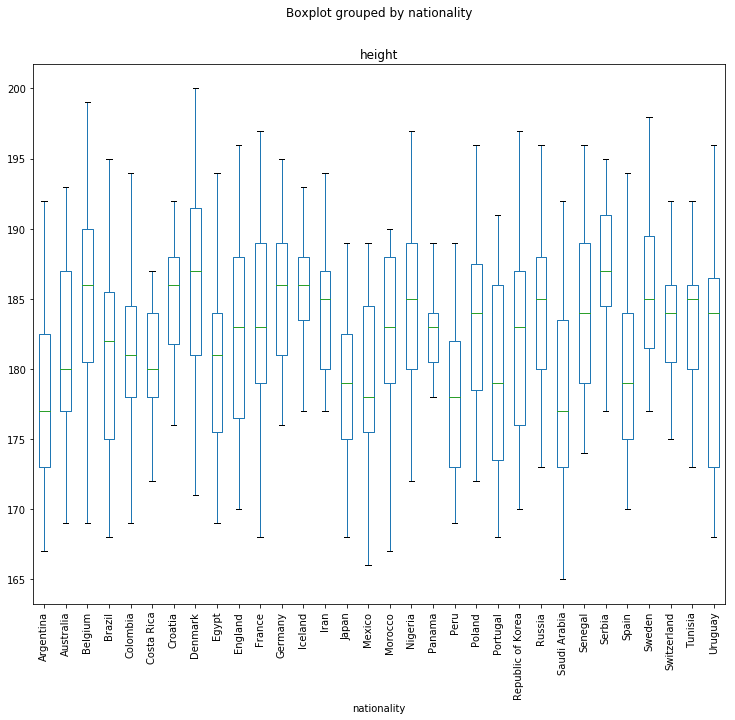

In [270]:
boxprops = dict(linestyle='-', linewidth=1, color='black')
whiskerprops = dict(linestyle='-',linewidth=1, color='black')
df.boxplot(column='height', by='nationality', rot=90, figsize=(12,10),
           grid=False, boxprops=boxprops, whiskerprops=whiskerprops, showfliers=False, notch=False)

### Player heights

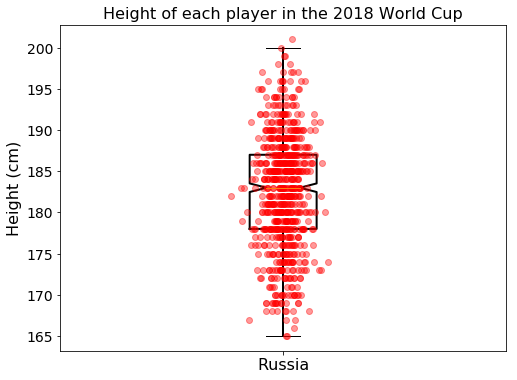

In [248]:
fig, ax = plt.subplots(figsize=(8, 6))
boxprops = dict(linestyle='-', linewidth=2, color='black')
whiskerprops = dict(linestyle='-',linewidth=2.0, color='black')
ax.boxplot(heights, boxprops=boxprops, whiskerprops=whiskerprops, showfliers=False, notch=True)

# Add some random jitter to the x-axis
x = np.random.normal(1, 0.03, size=len(heights))
plt.plot(x, heights, '.', color="#"+dat['jerseys'][0]['base'], alpha=0.4, markersize=12)

# Touch up the plot
# ax.set_xlabel("Artist gender", fontsize=FS)
ax.set_ylabel("Height (cm)", fontsize=FS)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FS-2) 
ax.set_xticklabels(["Russia"], fontsize=FS)
ax.set_title("Height of each player in the 2018 World Cup", fontsize=FS)
plt.show()

In [136]:
worldcup['groups'][0]['teams'][0]

{'id': 'sr:competitor:4694',
 'name': 'Russia',
 'country': 'Russia',
 'country_code': 'RUS',
 'abbreviation': 'RUS'}

In [93]:
tournys = sportsradar.get_tournaments()

In [95]:
data = tournys.json()

In [106]:
data['tournaments'][4]

{'id': 'sr:tournament:16',
 'name': 'World Cup',
 'sport': {'id': 'sr:sport:1', 'name': 'Soccer'},
 'category': {'id': 'sr:category:4', 'name': 'International'},
 'current_season': {'id': 'sr:season:48238',
  'name': 'World Cup 2018',
  'start_date': '2018-06-14',
  'end_date': '2018-07-16',
  'year': '2018'},
 'season_coverage_info': {'season_id': 'sr:season:48238',
  'scheduled': 42,
  'played': 13,
  'max_coverage_level': 'platinum',
  'max_covered': 13,
  'min_coverage_level': 'platinum'}}

In [104]:
[t['name'] for t in data['tournaments']]

['European Championship',
 'WC Qualification, UEFA',
 'WC Qualification, CAF',
 'WC Qual, CONCACAF',
 'World Cup',
 'U21 Euro Qualification',
 'European Ch.ship QF',
 'AFC Asian Cup QF',
 'Copa America',
 'Gold Cup',
 'AFC Asian Cup',
 'U19 European Ch.ship',
 'Africa Cup of Nations',
 'U17 World Cup',
 'World Cup, Women',
 'WC Qual, CONMEBOL',
 'WC Qualification, AFC',
 'WC Qualification, OFC',
 'East Asian Championship',
 'East Asian Champio. Women',
 'Algarve Cup Women',
 'U17 European Ch.ship',
 'Olympic Games',
 'Olympic Games Women',
 'U21 Toulon Tournament',
 'U20 World Cup',
 'U21 European Ch.ship',
 'Confederations Cup',
 'European Ch.ship Women',
 'AFF Suzuki Cup',
 'Gulf Cup',
 'U20 CONMEBOL Ch.ship',
 'African Nations Ch.ship',
 'U20 CONCACAF Ch.ship',
 'U19 Euro Womens Ch.ship',
 'U19 Euro W Ch.ship, QF',
 'U19 European Ch.ship, QF',
 'U17 Euro W Ch.ship, QF',
 'U17 European Ch.ship QF',
 'WC Qualification Women',
 'U20 Womens World Cup',
 'U17 Womens World Cup',
 'WAFF Ch

In [ ]:
uri = self._BASE_URL + "players"
uri = "{base}/players/{player_id}/profile.{}".format()
